# Feature Extraction of the four Datasets


## Libraries

In [1]:
import scipy.io
import numpy as np
import array as arr
from numpy import *
import scipy.linalg
import csv
import matplotlib.pyplot as plt

## Feature Functions

Mean Absolute Value

In [2]:
def MAVch(EMG,ch):
    if len(EMG)==1:
        mavVector=np.zeros((1,ch))[0]
    else:
        EMG=abs(EMG)
        mavVector=EMG.mean(axis=0)
    return mavVector

Waveform Length

In [3]:
def WLch(EMG,ch):
    if len(EMG)==1:
        wlVector=np.zeros((1,ch))
    else:
        wlVector=np.zeros([1, ch])
        for i in range(0,ch):
            x_f=EMG[1:size(EMG,0),i]
            x=EMG[0:size(EMG,0)-1,i]
            wlVector[0,i]=np.sum(abs(x_f-x))
    return wlVector

In [4]:
def ZCch(EMG,ch):
    if len(EMG)==1:
        zcVector=np.zeros((1,ch))
    else:
        zcVector=np.zeros([1, ch])
        for i in range(0,ch):
            zcVector[0,i]=size(np.where(np.diff(np.sign(EMG[:,i]))),1)
    return zcVector

In [5]:
def SSCch(EMG,ch):
    if len(EMG)==1:
        sscVector=np.zeros((1,ch))
    else:
        sscVector=np.zeros([1, ch])
        for i in range(0,ch):
            x=EMG[1:size(EMG,0)-1,i]
            x_b=EMG[0:size(EMG,0)-2,i]
            x_f=EMG[2:size(EMG,0),i]
            sscVector[0,i]=np.sum(abs((x-x_b)*(x-x_f)))
    return sscVector

In [6]:
def Lscalech(EMG,ch):
    if len(EMG)==1:
        LscaleVector=np.zeros((1,ch))
    else:
        LscaleVector=np.zeros([1, ch])
        for i in range(0,ch):
            lengthAux = size(EMG[:,i],0)
            Matrix = sort(np.transpose(EMG[:,i]))
            aux =(1/lengthAux)*np.sum((np.arange(1,lengthAux,1)/(lengthAux-1))*Matrix[1:lengthAux+1])
            aux3=np.array([[aux],[np.mean(EMG[:,i])]])
            aux5=np.array([[2],[-1]])
            LscaleVector[0,i]= np.sum(aux5*aux3)
    return LscaleVector

In [7]:
def MFLch(EMG,ch):
    if len(EMG)==1:
        mflVector=np.zeros((1,ch))
    else:
        mflVector=np.zeros([1, ch])
        for i in range(0,ch):
            x_f=EMG[1:size(EMG,0),i]
            x=EMG[0:size(EMG,0)-1,i]
            mflVector[0,i]=np.log10(np.sqrt(np.sum((x_f-x)**2)))
    return mflVector

In [8]:
def MSRch(EMG,ch):
    if len(EMG)==1:
        msrVector=np.zeros((1,ch))
    else:
        msrVector=np.zeros([1, ch])
        for i in range(0,ch):
            msrVector[0,i]=np.sum(np.sqrt(abs(EMG[:,i])))/size(EMG[:,i],0)
    return msrVector

In [9]:
def WAMPch(EMG,ch):
    if len(EMG)==1:
        wampVector=np.zeros((1,ch))
    else:
        wampVector=np.zeros([1, ch])
        for i in range(0,ch):
            x_f=EMG[1:size(EMG,0),i]
            x=EMG[0:size(EMG,0)-1,i]
            wampVector[0,i]=np.sum((np.sign(x-x_f)+1)/2)
    return wampVector

In [10]:
def RMSch(EMG,ch):
    if len(EMG)==1:
        rmsVector=np.zeros((1,ch))
    else:
        rmsVector=np.zeros([1, ch])
        for i in range(0,ch):
            rmsVector[0,i]=np.sqrt(np.sum((EMG[:,i])**2)/size(EMG[:,i],0))
    return rmsVector

In [11]:
def IAVch(EMG,ch):
    if len(EMG)==1:
        iavVector=np.zeros((1,ch))
    else:
        iavVector=np.zeros([1, ch])
        for i in range(0,ch):
            iavVector[0,i]=np.sum(abs(EMG[:,i])/size(EMG[:,i],0))
    return iavVector

In [12]:
def DASDVch(EMG,ch):
    if len(EMG)==1:
        dasdvVector=np.zeros((1,ch))
    else:
        dasdvVector=np.zeros([1, ch])
        for i in range(0,ch):
            x_f=EMG[1:size(EMG,0),i]
            x=EMG[0:size(EMG,0)-1,i]
            dasdvVector[0,i]=np.sqrt(np.sum((x_f-x)**2)/size(x,0))
    return dasdvVector

In [13]:
def VARch(EMG,ch):
    if len(EMG)==1:
        varVector=np.zeros((1,ch))
    else:
        varVector=np.zeros([1, ch])
        for i in range(0,ch):
            varVector[0,i]=np.sum((EMG[:,i])**2)/(size(EMG[:,i],0)-1)
    return varVector

Nina Pro DB6

In [14]:
rpt=12
ch=14
classes=7
people=10
days=5
times=2
sampleRate=2000
window=260
overlap=235
windowSamples=int(window*sampleRate/1000)
overlapSamples=int(overlap*sampleRate/1000)

In [21]:
mavMatrix=[]
wlMatrix=[]
zcMatrix=[]
sscMatrix=[]
lscaleMatrix=[]
mflMatrix=[]
msrMatrix=[]
wampMatrix=[]
rmsMatrix=[]
iavMatrix=[]
dasdvMatrix=[]
varMatrix=[]

for person in range(1,people+1):
    for day in range(1,days+1):
        if day>=4:
            carpet='b'
        else:
            carpet='a'
        for time in range(1,times+1):
            aux=scipy.io.loadmat('../data/ninaDB6/DB6_s'+str(person)+'_'+carpet+'/S'+str(person)+'_D'+str(day)+'_T'+str(time)+'.mat')
            auxEMG=aux['emg']
            auxRestimulus=aux['restimulus']
            
            stack=0
            rp=1
            
            for i in range(0,size(auxRestimulus)):
                if auxRestimulus[i]!=0 and stack==0:
                    aux1=i
                    stack=1
                    cl=int(auxRestimulus[i])
                elif auxRestimulus[i]==0 and stack==1:
                    aux2=i-1
                    stack=0
                    wi=aux1
                    wf=aux2
                    
                    mavMatrix.append(np.hstack((MAVch(np.delete(auxEMG[wi:wf],(8,9),1),ch),np.array([person,day,time,cl,rp]))))
                    wlMatrix.append(np.hstack((WLch(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    zcMatrix.append(np.hstack((ZCch(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    sscMatrix.append(np.hstack((SSCch(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    lscaleMatrix.append(np.hstack((Lscalech(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    mflMatrix.append(np.hstack((MFLch(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    msrMatrix.append(np.hstack((MSRch(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    wampMatrix.append(np.hstack((WAMPch(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    rmsMatrix.append(np.hstack((RMSch(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    iavMatrix.append(np.hstack((IAVch(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    dasdvMatrix.append(np.hstack((DASDVch(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    varMatrix.append(np.hstack((VARch(np.delete(auxEMG[wi:wf],(8,9),1),ch)[0],np.array([person,day,time,cl,rp]))))
                    
                    rp=rp+1
                    
                    
                    

NameError: name 'days' is not defined

In [19]:
mavMatrix=np.array(mavMatrix)
mavMatrix=np.delete(mavMatrix, np.where(mavMatrix[:,14]==0), axis=0)
mavMatrix=np.delete(mavMatrix, np.where((mavMatrix[:,14]==2)*(mavMatrix[:,15]==2)*(mavMatrix[:,16]==2)), axis=0)
wlMatrix=np.array(wlMatrix)
wlMatrix=np.delete(wlMatrix, np.where(wlMatrix[:,14]==0), axis=0)
wlMatrix=np.delete(wlMatrix, np.where((wlMatrix[:,14]==2)*(wlMatrix[:,15]==2)*(wlMatrix[:,16]==2)), axis=0)
zcMatrix=np.array(zcMatrix)
zcMatrix=np.delete(zcMatrix, np.where(zcMatrix[:,14]==0), axis=0)
zcMatrix=np.delete(zcMatrix, np.where((zcMatrix[:,14]==2)*(zcMatrix[:,15]==2)*(zcMatrix[:,16]==2)), axis=0)
sscMatrix=np.array(sscMatrix)
sscMatrix=np.delete(sscMatrix, np.where(sscMatrix[:,14]==0), axis=0)
sscMatrix=np.delete(sscMatrix, np.where((sscMatrix[:,14]==2)*(sscMatrix[:,15]==2)*(sscMatrix[:,16]==2)), axis=0)
lscaleMatrix=np.array(lscaleMatrix)
lscaleMatrix=np.delete(lscaleMatrix, np.where(lscaleMatrix[:,14]==0), axis=0)
lscaleMatrix=np.delete(lscaleMatrix, np.where((lscaleMatrix[:,14]==2)*(lscaleMatrix[:,15]==2)*(lscaleMatrix[:,16]==2)), axis=0)
mflMatrix=np.array(mflMatrix)
mflMatrix=np.delete(mflMatrix, np.where(mflMatrix[:,14]==0), axis=0)
mflMatrix=np.delete(mflMatrix, np.where((mflMatrix[:,14]==2)*(mflMatrix[:,15]==2)*(mflMatrix[:,16]==2)), axis=0)
msrMatrix=np.array(msrMatrix)
msrMatrix=np.delete(msrMatrix, np.where(msrMatrix[:,14]==0), axis=0)
msrMatrix=np.delete(msrMatrix, np.where((msrMatrix[:,14]==2)*(msrMatrix[:,15]==2)*(msrMatrix[:,16]==2)), axis=0)
wampMatrix=np.array(wampMatrix)
wampMatrix=np.delete(wampMatrix, np.where(wampMatrix[:,14]==0), axis=0)
wampMatrix=np.delete(wampMatrix, np.where((wampMatrix[:,14]==2)*(wampMatrix[:,15]==2)*(wampMatrix[:,16]==2)), axis=0)
rmsMatrix=np.array(rmsMatrix)
rmsMatrix=np.delete(rmsMatrix, np.where(rmsMatrix[:,14]==0), axis=0)
rmsMatrix=np.delete(rmsMatrix, np.where((rmsMatrix[:,14]==2)*(rmsMatrix[:,15]==2)*(rmsMatrix[:,16]==2)), axis=0)
iavMatrix=np.array(iavMatrix)
iavMatrix=np.delete(iavMatrix, np.where(iavMatrix[:,14]==0), axis=0)
iavMatrix=np.delete(iavMatrix, np.where((iavMatrix[:,14]==2)*(iavMatrix[:,15]==2)*(iavMatrix[:,16]==2)), axis=0)
dasdvMatrix=np.array(dasdvMatrix)
dasdvMatrix=np.delete(dasdvMatrix, np.where(dasdvMatrix[:,14]==0), axis=0)
dasdvMatrix=np.delete(dasdvMatrix, np.where((dasdvMatrix[:,14]==2)*(dasdvMatrix[:,15]==2)*(dasdvMatrix[:,16]==2)), axis=0)
varMatrix=np.array(varMatrix)
varMatrix=np.delete(varMatrix, np.where(varMatrix[:,14]==0), axis=0)
varMatrix=np.delete(varMatrix, np.where((varMatrix[:,14]==2)*(varMatrix[:,15]==2)*(varMatrix[:,16]==2)), axis=0)

In [75]:
#auxClass=np.vstack([1*np.ones((rpt,1)),2*np.ones((rpt,1)),3*np.ones((rpt,1)),4*np.ones((rpt,1)),5*np.ones((rpt,1)),6*np.ones((rpt,1)),7*np.ones((rpt,1))])

#mavMatrix=np.hstack([mavMatrix,np.tile(auxClass,(people*days*times-1,1))])
#wlMatrix=np.hstack([wlMatrix,np.tile(auxClass,(people*days*times-1,1))])
#zcMatrix=np.hstack([zcMatrix,np.tile(auxClass,(people*days*times-1,1))])
#sscMatrix=np.hstack([sscMatrix,np.tile(auxClass,(people*days*times-1,1))])
#lscaleMatrix=np.hstack([lscaleMatrix,np.tile(auxClass,(people*days*times-1,1))])
#mflMatrix=np.hstack([mflMatrix,np.tile(auxClass,(people*days*times-1,1))])
#msrMatrix=np.hstack([msrMatrix,np.tile(auxClass,(people*days*times-1,1))])
#wampMatrix=np.hstack([wampMatrix,np.tile(auxClass,(people*days*times-1,1))])
#rmsMatrix=np.hstack([rmsMatrix,np.tile(auxClass,(people*days*times-1,1))])
#iavMatrix=np.hstack([iavMatrix,np.tile(auxClass,(people*days*times-1,1))])
#dasdvMatrix=np.hstack([dasdvMatrix,np.tile(auxClass,(people*days*times-1,1))])
#varMatrix=np.hstack([varMatrix,np.tile(auxClass,(people*days*times-1,1))])

In [20]:
auxName='mavMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(mavMatrix)
auxName='wlMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(wlMatrix)
auxName='zcMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(zcMatrix)
auxName='sscMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(sscMatrix)
auxName='lscaleMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(lscaleMatrix)
auxName='mflMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(mflMatrix)
auxName='msrMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(msrMatrix)
auxName='wampMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(wampMatrix)
auxName='rmsMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(rmsMatrix)
auxName='iavMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(iavMatrix)
auxName='dasdvMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(dasdvMatrix)
auxName='varMatrix'
myFile = open('ExtractedDataNinaDB6/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(varMatrix)

Nina Pro DB5

In [2]:
rpt=6
ch=16
classes=17
people=10
sampleRate=200
window=260
overlap=235
windowSamples=int(window*sampleRate/1000)
overlapSamples=int(overlap*sampleRate/1000)

2000


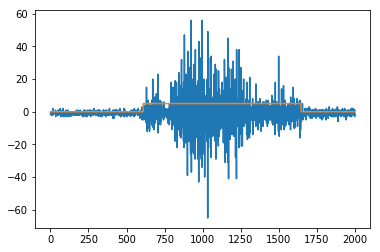

In [42]:
mavMatrix=[]
wlMatrix=[]
zcMatrix=[]
sscMatrix=[]
lscaleMatrix=[]
mflMatrix=[]
msrMatrix=[]
wampMatrix=[]
rmsMatrix=[]
iavMatrix=[]
dasdvMatrix=[]
varMatrix=[]

for person in range(1,people+1):
    aux=scipy.io.loadmat('../data/ninaDB5/s'+str(person)+'/S'+str(person)+'_E2_A1.mat')
    auxEMG=aux['emg']
    auxRestimulus=aux['restimulus']
a=500
b=2500
print(size(auxEMG[a:b],0))
# print(auxRestimulus[a:b])
plt.plot(np.arange(size(auxEMG[a:b],0)),auxEMG[a:b,0])
plt.plot(np.arange(size(auxEMG[a:b],0)),auxRestimulus[a:b]*5)
# plt.plot(auxRestimulus[b:a])
            
#     stack=0
#     rp=1
#     for i in range(0,size(auxRestimulus)):
        
#         if auxRestimulus[i]!=0 and stack==0:
#             aux1=i
#             stack=1
#             cl=int(auxRestimulus[i])
             
#         elif auxRestimulus[i]==0 and stack==1:
#             aux2=i-1
#             stack=0
#             wi=aux1
#             wf=aux2
                
#             mavMatrix.append(np.hstack((MAVch(auxEMG[wi:wf],ch),np.array([person,cl,rp]))))
#             wlMatrix.append(np.hstack((WLch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             zcMatrix.append(np.hstack((ZCch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             sscMatrix.append(np.hstack((SSCch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             lscaleMatrix.append(np.hstack((Lscalech(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             mflMatrix.append(np.hstack((MFLch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             msrMatrix.append(np.hstack((MSRch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             wampMatrix.append(np.hstack((WAMPch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             rmsMatrix.append(np.hstack((RMSch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             iavMatrix.append(np.hstack((IAVch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             dasdvMatrix.append(np.hstack((DASDVch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             varMatrix.append(np.hstack((VARch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
#             rp=rp+1 
#             if rp==7:
#                 rp=1
             

In [23]:
mavMatrix=[]
wlMatrix=[]
zcMatrix=[]
sscMatrix=[]
lscaleMatrix=[]
mflMatrix=[]
msrMatrix=[]
wampMatrix=[]
rmsMatrix=[]
iavMatrix=[]
dasdvMatrix=[]
varMatrix=[]

for person in range(1,people+1):
    aux=scipy.io.loadmat('../data/ninaDB5/s'+str(person)+'/S'+str(person)+'_E2_A1.mat')
    auxEMG=aux['emg']
    auxRestimulus=aux['restimulus']
            
    stack=0
    rp=1
    for i in range(0,size(auxRestimulus)):
        
        if auxRestimulus[i]!=0 and stack==0:
            aux1=i
            stack=1
            cl=int(auxRestimulus[i])
             
        elif auxRestimulus[i]==0 and stack==1:
            aux2=i-1
            stack=0
            wi=aux1
            wf=aux2
                
            mavMatrix.append(np.hstack((MAVch(auxEMG[wi:wf],ch),np.array([person,cl,rp]))))
            wlMatrix.append(np.hstack((WLch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            zcMatrix.append(np.hstack((ZCch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            sscMatrix.append(np.hstack((SSCch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            lscaleMatrix.append(np.hstack((Lscalech(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            mflMatrix.append(np.hstack((MFLch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            msrMatrix.append(np.hstack((MSRch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            wampMatrix.append(np.hstack((WAMPch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            rmsMatrix.append(np.hstack((RMSch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            iavMatrix.append(np.hstack((IAVch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            dasdvMatrix.append(np.hstack((DASDVch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            varMatrix.append(np.hstack((VARch(auxEMG[wi:wf],ch)[0],np.array([person,cl,rp]))))
            rp=rp+1 
            if rp==7:
                rp=1
             

In [24]:
#auxClass=np.vstack([1*np.ones((rpt,1)),2*np.ones((rpt,1)),3*np.ones((rpt,1)),4*np.ones((rpt,1)),5*np.ones((rpt,1)),6*np.ones((rpt,1)),7*np.ones((rpt,1))
#                   ,8*np.ones((rpt,1)),9*np.ones((rpt,1)),10*np.ones((rpt,1)),11*np.ones((rpt,1)),12*np.ones((rpt,1)),13*np.ones((rpt,1)),14*np.ones((rpt,1))
#                   ,15*np.ones((rpt,1)),16*np.ones((rpt,1)),17*np.ones((rpt,1))])

#mavMatrix=np.hstack([mavMatrix,np.tile(auxClass,(people,1))])
#wlMatrix=np.hstack([wlMatrix,np.tile(auxClass,(people,1))])
#zcMatrix=np.hstack([zcMatrix,np.tile(auxClass,(people,1))])
#sscMatrix=np.hstack([sscMatrix,np.tile(auxClass,(people,1))])
#lscaleMatrix=np.hstack([lscaleMatrix,np.tile(auxClass,(people,1))])
#mflMatrix=np.hstack([mflMatrix,np.tile(auxClass,(people,1))])
#msrMatrix=np.hstack([msrMatrix,np.tile(auxClass,(people,1))])
#wampMatrix=np.hstack([wampMatrix,np.tile(auxClass,(people,1))])
#rmsMatrix=np.hstack([rmsMatrix,np.tile(auxClass,(people,1))])
#iavMatrix=np.hstack([iavMatrix,np.tile(auxClass,(people,1))])
#dasdvMatrix=np.hstack([dasdvMatrix,np.tile(auxClass,(people,1))])
#varMatrix=np.hstack([varMatrix,np.tile(auxClass,(people,1))])

In [25]:
auxName='mavMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(mavMatrix)
auxName='wlMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(wlMatrix)
auxName='zcMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(zcMatrix)
auxName='sscMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(sscMatrix)
auxName='lscaleMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(lscaleMatrix)
auxName='mflMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(mflMatrix)
auxName='msrMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(msrMatrix)
auxName='wampMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(wampMatrix)
auxName='rmsMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(rmsMatrix)
auxName='iavMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(iavMatrix)
auxName='dasdvMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(dasdvMatrix)
auxName='varMatrix'
myFile = open('ExtractedDataNinaDB5/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(varMatrix)

Collected Data

  

In [24]:
rpt=25
ch=8
classes=5
people=60
types=2
sampleRate=200
window=260
overlap=235
windowSamples=int(window*sampleRate/1000)
overlapSamples=int(overlap*sampleRate/1000)

In [27]:
mavMatrix=[]
wlMatrix=[]
zcMatrix=[]
sscMatrix=[]
lscaleMatrix=[]
mflMatrix=[]
msrMatrix=[]
wampMatrix=[]
rmsMatrix=[]
iavMatrix=[]
dasdvMatrix=[]
varMatrix=[]

for ty in range(0,types):
    for person in range(1,people+1):
        for cl in range(1,classes+1):
            for rp in range(1,rpt+1):            
                aux=scipy.io.loadmat('../data/CollectedData/emg_person'+str(person)+'_class'+str(cl)+'_rpt'+str(rp)+'_type'+str(ty)+'.mat')
                auxEMG=aux['aux2']
                
                wi=0
                wf=len(auxEMG)
                                    
                mavMatrix.append(np.hstack((MAVch(auxEMG[wi:wf],ch),np.array([ty,person,cl,rp]))))
                wlMatrix.append(np.hstack((WLch(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                zcMatrix.append(np.hstack((ZCch(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                sscMatrix.append(np.hstack((SSCch(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                lscaleMatrix.append(np.hstack((Lscalech(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                mflMatrix.append(np.hstack((MFLch(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                msrMatrix.append(np.hstack((MSRch(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                wampMatrix.append(np.hstack((WAMPch(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                rmsMatrix.append(np.hstack((RMSch(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                iavMatrix.append(np.hstack((IAVch(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                dasdvMatrix.append(np.hstack((DASDVch(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                varMatrix.append(np.hstack((VARch(auxEMG[wi:wf],ch)[0],np.array([ty,person,cl,rp]))))
                    
                    
                
                 
   

In [28]:
auxName='mavMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(mavMatrix)
auxName='wlMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(wlMatrix)
auxName='zcMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(zcMatrix)
auxName='sscMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(sscMatrix)
auxName='lscaleMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(lscaleMatrix)
auxName='mflMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(mflMatrix)
auxName='msrMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(msrMatrix)
auxName='wampMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(wampMatrix)
auxName='rmsMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(rmsMatrix)
auxName='iavMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(iavMatrix)
auxName='dasdvMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(dasdvMatrix)
auxName='varMatrix'
myFile = open('ExtractedDataCollectedData/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(varMatrix)

Cote Allard Data

In [14]:
rpt=4
ch=8
classes=7
peopleFemalePT=7
peopleMalePT=12
peopleFemaleE=2
peopleMaleE=15
types=2
genders=2
filesPerFolder=28
sampleRate=200
window=260
overlap=235
windowSamples=int(window*sampleRate/1000)
overlapSamples=int(overlap*sampleRate/1000)


In [15]:
def emgMatrix(ty,gender,person,carpet,number):
    myarray = np.fromfile('../data/MyoArmbandDataset-master/'+ty+'/'+gender+str(person)+'/'+carpet+'/classe_'+str(number)+'.dat', dtype=np.int16)
    myarray= np.array(myarray, dtype=np.float32)
    emg = []
    emg_vector = []
    for value in myarray:
        emg_vector.append(value)
        if (len(emg_vector) >= 8):
            if (emg == []):
                emg = emg_vector
            else:
                emg = np.row_stack((emg, emg_vector))
            emg_vector = []
    return emg

In [16]:
mavMatrix=[]
wlMatrix=[]
zcMatrix=[]
sscMatrix=[]
lscaleMatrix=[]
mflMatrix=[]
msrMatrix=[]
wampMatrix=[]
rmsMatrix=[]
iavMatrix=[]
dasdvMatrix=[]
varMatrix=[]

p=-1

for tyi in range(0,types):
    
    for genderi in range(0,genders):
        if tyi==0 and genderi==0:
            ty='PreTrainingDataset'
            gender='Female'
            carpets=np.array(['training0'])
            people=peopleFemalePT
        elif tyi==0 and genderi==1:
            ty='PreTrainingDataset'
            gender='Male'
            carpets=np.array(['training0'])
            people=peopleMalePT
        elif tyi==1 and genderi==0:
            ty='EvaluationDataset'
            gender='Female'
            carpets=np.array(['training0','Test0','Test1'])
            people=peopleFemaleE
        elif tyi==1 and genderi==1:
            ty='EvaluationDataset'
            gender='Male'
            carpets=np.array(['training0','Test0','Test1'])
            people=peopleMaleE        
        
        for person in range(0,people):
            p=p+1
            rp=1
            for carpet in carpets:
                if carpet == 'training0':
                    carp=1
                else:
                    carp=2
                
                for number in range(0,filesPerFolder):
                    cl=number
                    while (cl>6):
                        cl=cl-7
                    
                    auxEMG=emgMatrix(ty,gender,person,carpet,number)
                    
                    wi=0
                    wf=len(auxEMG)
                    
                   
                        
                    mavMatrix.append(np.hstack((MAVch(auxEMG[wi:wf],ch),np.array([tyi,p,carp,cl,rp]))))
                    wlMatrix.append(np.hstack((WLch(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                    zcMatrix.append(np.hstack((ZCch(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                    sscMatrix.append(np.hstack((SSCch(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                    lscaleMatrix.append(np.hstack((Lscalech(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                    mflMatrix.append(np.hstack((MFLch(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                    msrMatrix.append(np.hstack((MSRch(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                    wampMatrix.append(np.hstack((WAMPch(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                    rmsMatrix.append(np.hstack((RMSch(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                    iavMatrix.append(np.hstack((IAVch(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                    dasdvMatrix.append(np.hstack((DASDVch(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                    varMatrix.append(np.hstack((VARch(auxEMG[wi:wf],ch)[0],np.array([tyi,p,carp,cl,rp]))))
                        
                       
                    if cl==6:
                        rp=rp+1
                 
   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


In [17]:
auxName='mavMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(mavMatrix)
auxName='wlMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(wlMatrix)
auxName='zcMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(zcMatrix)
auxName='sscMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(sscMatrix)
auxName='lscaleMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(lscaleMatrix)
auxName='mflMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(mflMatrix)
auxName='msrMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(msrMatrix)
auxName='wampMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(wampMatrix)
auxName='rmsMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(rmsMatrix)
auxName='iavMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(iavMatrix)
auxName='dasdvMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(dasdvMatrix)
auxName='varMatrix'
myFile = open('ExtractedDataCoteAllard/'+auxName+'NoSeg.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(varMatrix)
